# R_exe

###### Q1) Probability of answering 4 or less correct answers in a multiple choice test made by 12 questions with 5 possible answers.

In [192]:
#Headers, libraries

import numpy as np
import statsmodels.stats.api as sms
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import math as m

np.set_printoptions(precision=2)

#Class included in the notebook 
##################### https://nicolewhite.github.io
from math import pow, exp, factorial

class Exponential():

    def __init__(self, rate):
        self.rate = rate

    def prob_less_than_or_equal(self, t):
        rate = self.rate * t
        return 1 - exp(-rate)

    def prob_greater_than(self, t):
        return 1 - self.prob_less_than_or_equal(t)

    def prob_between(self, t1, t2):
        p1 = self.prob_less_than_or_equal(t1)
        p2 = self.prob_less_than_or_equal(t2)

        return p2 - p1
####################################################

#Datasets needed:
immer = pd.read_csv("immer.csv")
mtcars = pd.read_csv("mtcars.csv")

In [193]:
#P(X <= 4)
#Computing probability by binomial distribution

n = 4
p = 0.5
k = np.arange(0,12)

binomial = sp.binom.pmf(k, n, p)

#Printing results
binomial


array([0.06, 0.25, 0.38, 0.25, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

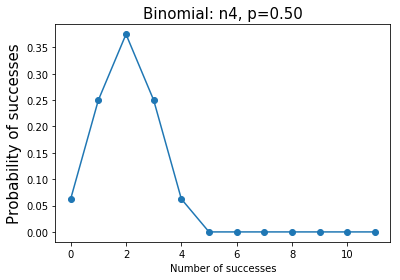

In [194]:
plt.plot(k, binomial, 'o-')
plt.title('Binomial: n%i, p=%.2f'% (n,p),fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)
plt.show()

In [195]:
P1 = 0
for item in binomial[0:4]:
    #print (item)
    temp = item
    P1 = P1 + temp
print ("Cumulative probability: ", '%.3f'%P1)

Cumulative probability:  0.938


###### ----------------------------------------------------------------------------------------------------------------

###### Q2) Probability of check-out time being less than 2 min where average rate is 3 per minute

In [196]:
#Computing probability with exp distribution (time interval between two events)
#e = m.exp(1)
expo = Exponential(2)

P2 = expo.prob_less_than_or_equal(1/3)
#Printing results
print ("Cumulative probability: ", '%.5f'%P2)

Cumulative probability:  0.48658


###### ----------------------------------------------------------------------------------------------------------------

###### Q3) find the 2.5th and 97.5th percentiles of the student's T distribution with 5 degrees of freedom

In [7]:
sp.t(df=5).ppf((0.025, 0.975))

array([-2.57,  2.57])

###### ----------------------------------------------------------------------------------------------------------------

###### Q4)Hypothesis testing with a sampled mean of 9900, sample size of 30, population std.dev of 120 hours 

In [8]:
n = 30
s = 120
mu_0 = 10000
x_bar = 9900

In [9]:
z = (x_bar - mu_0)/(s/m.sqrt(n))

In [10]:
pvalue = sp.norm.cdf(z)
print ('%.12f'%pvalue)


0.000002505166


###### Null H: mean = 10000
###### Alt H: mean < 10000
###### P-value < 0.05 => Reject Null hypothesis

###### ----------------------------------------------------------------------------------------------------------------

###### Q5) Categorical data Hypothesis testing on repeated sampling. 


In [11]:
"""
Sample proportion 60%. Sample proportion of the sampled size 85/148
Confidence level = 95%.

Null H_0: p0 = 0.6
Altn H_a: p0 > 0.6
"""

#declaring variables
n = 148
p0 = 0.6
pbar = 86/148
alpha = 0.05
sigma = m.sqrt(p0*((1-p0)/n)) #Stdev estimate from Bernoulli categorical distribution



In [15]:
#Computing z score (sampled size first since we use pnorm to evaluate p-value)
z = (pbar - p0)/sigma

pvalue = sp.norm.cdf(z)
print ('%.12f'%pvalue)

0.319245656622


In [18]:
if (pvalue < alpha):
  print("Reject H_0")
else: 
  print("Fail to reject H_0")

#Sol: "Fail to reject H_0"

Fail to reject H_0


###### Sol:P-value > 0.05 => Fail to reject Null hypothesis

###### ----------------------------------------------------------------------------------------------------------------

###### Q6) Assuming that the data in immer follows the normal distribution, find the 95% confidence interval estimate of the difference between the mean barley yields between years 1931 and 1932.


The two distribution come from the same sample The paired t-test function will:

1) consider the sum of the two distribution as one and compute their joint mean and joint variance

2) consider the distance in the two means (d = m_Y1 - m_Y1 )

3) consider the new mean (m_Y1 - m_Y1) as the mean of the joint distribution and compute a confidence interval that contains it 95% of the time (using the std normal z-value = 1,96, 1,96*sum of their variance)

4) test whenever the new mean has a random chance of less than 5% of ending in it 


In [77]:
immer #imported as a dataframe

,Unnamed: 0,Loc,Var,Y1,Y2
0,1,UF,M,81.0,80.7
1,2,UF,S,105.4,82.3
2,3,UF,V,119.7,80.4
3,4,UF,T,109.7,87.2
4,5,UF,P,98.3,84.2
5,6,W,M,146.6,100.4
6,7,W,S,142.0,115.5
7,8,W,V,150.7,112.2
8,9,W,T,191.5,147.7
9,10,W,P,145.7,108.1


In [78]:
a = immer.Y1
b = immer.Y2

In [75]:
#Using scipy libraries to find the confidence interval

In [137]:
d1 = sms.DescrStatsW(a - b)

In [138]:
d1.ttest_mean()

(3.3239873042716783, 0.002412633863616766, 29.0)

In [252]:
print("95% confidence interval is", d1.tconfint_mean())

95% confidence interval is (6.1219538666770905, 25.704712799989572)


###### ----------------------------------------------------------------------------------------------------------------

###### Q7) Assuming that the data in mtcars follows the normal distribution, find the 95% confidence interval estimate of the difference between the mean gas mileage of manual and automatic transmissions.


In [203]:
mtcars #imported as a dataframe

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [223]:
#Crossing data: subselecting mileage per gallon with mt transmission
mpg_mt = mtcars[mtcars['mpg'].notnull() & (mtcars['am'] == 1)]

mpg_am = mtcars[mtcars['mpg'].notnull() & (mtcars['am'] == 0)]

In [224]:
mpg_mt

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


In [225]:
mpg_am

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [226]:
m_t = mpg_mt.mpg

In [227]:
m_a = mpg_am.mpg

In [251]:
#Building confidence interval for two means (unpaired)
cm = sms.CompareMeans(sms.DescrStatsW(m_a), sms.DescrStatsW(m_t))

print ("95% Confidence interval is:",cm.tconfint_diff(usevar='unequal'))

95% Confidence interval is: (-11.280194355040035, -3.209684187470086)


###### Q8) Without assuming the data to have normal distribution, test at .05 significance level if the barley yields of 1931 and 1932 in data set immer have identical data distributions (Identical population is the null hypothesis)


In [254]:
#Running Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution
w_test = sp.wilcoxon(a,b)

In [257]:
w_test

WilcoxonResult(statistic=96.5, pvalue=0.0051520795710785945)

In [289]:

pvalue = w_test[1]
alpha = 0.05

if (pvalue < alpha):
    print ("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


###### Sol:P-value > 0.05 => Reject null hypothesis